In [2]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.backend import clear_session
import tensorflow as tf
from keras import regularizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [4]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2

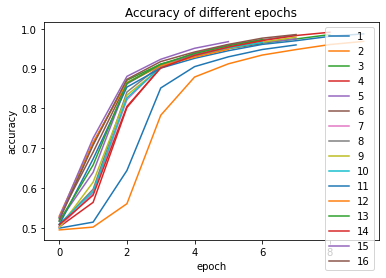

In [5]:
for neuron in range(1,17):
  clear_session()
  model = Sequential()
  model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  # model.add(Dropout(dropout))
  model.add(Dense(10, activation='relu'))
  # model.add(Dropout(dropout))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(neuron, activation='relu'))
  # model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  print(model.summary())
  # Fit the model
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, mode='max')
  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128, verbose=2, callbacks=[callback])
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  legend = [str(i) for i in range(1,17)]
  plt.title('Accuracy of different epochs')
  plt.plot(history.history['accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(legend)

In [30]:
len(history.history['val_accuracy'])

11

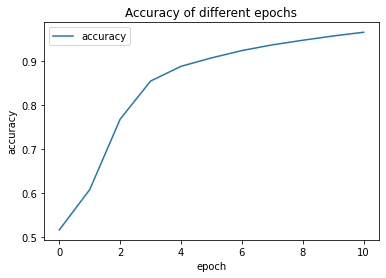

In [31]:
legend = [for i in range(16)]
plt.title('Accuracy of different epochs')
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(legend)

In [36]:
x=[ str(i) for i in range(1,17)]
print(x)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
